Masukkan nilai input:


Permintaan:  1000
Persediaan:  500



Hasil Defuzzifikasi Produksi: 2000.00
Produksi: Berkurang


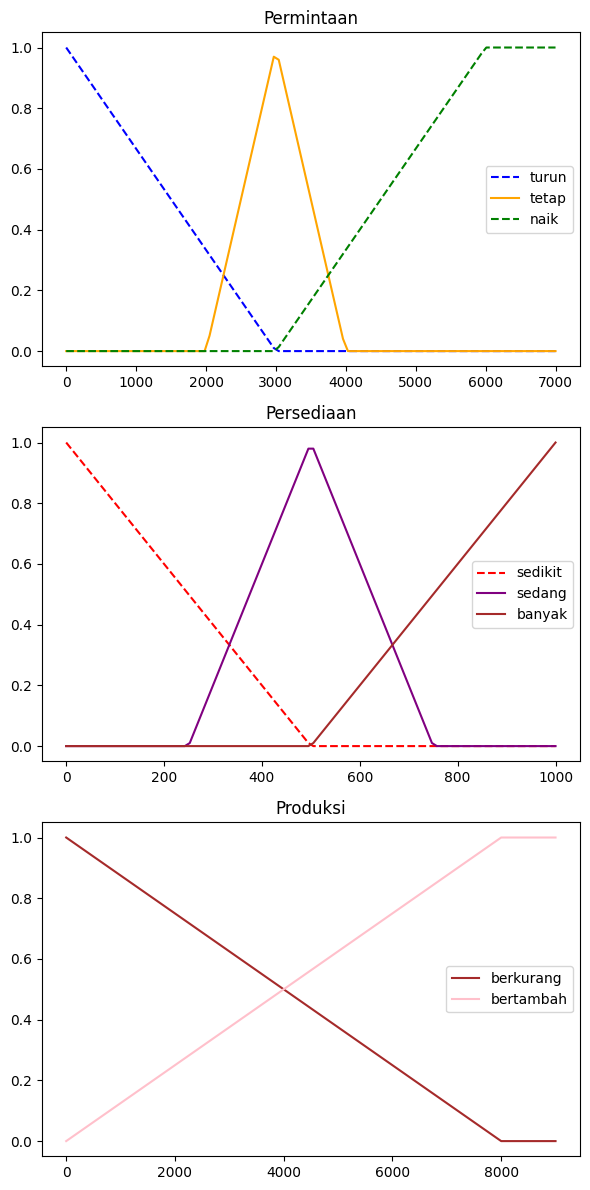

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk Permintaan
def membership_permintaan(x):
    turun = max(0, min((3000 - x) / 3000, 1)) if x <= 3000 else 0
    tetap = max(0, min((x - 2000) / 1000, (4000 - x) / 1000)) if 2000 <= x <= 4000 else 0
    naik = max(0, min((x - 3000) / 3000, 1)) if x >= 3000 else 0
    return {'turun': turun, 'tetap': tetap, 'naik': naik}

# Fungsi keanggotaan untuk Persediaan
def membership_persediaan(x):
    sedikit = max(0, min((500 - x) / 500, 1)) if x <= 500 else 0
    sedang = max(0, min((x - 250) / 250, (750 - x) / 250)) if 250 <= x <= 750 else 0
    banyak = max(0, min((x - 500) / 500, 1)) if x >= 500 else 0
    return {'sedikit': sedikit, 'sedang': sedang, 'banyak': banyak}

# Fungsi produksi berdasarkan rule
def inferensi_tsukamoto(permintaan, persediaan):
    permintaan_fuzzy = membership_permintaan(permintaan)
    persediaan_fuzzy = membership_persediaan(persediaan)
    
    # Nilai produksi untuk rule (crisp output)
    produksi_bertambah = 8000
    produksi_berkurang = 2000
    
    # Rule base
    rules = [
        ('turun', 'sedikit', produksi_bertambah),
        ('turun', 'sedang', produksi_berkurang),
        ('turun', 'banyak', produksi_berkurang),
        ('tetap', 'sedikit', produksi_bertambah),
        ('tetap', 'sedang', produksi_berkurang),
        ('tetap', 'banyak', produksi_berkurang),
        ('naik', 'sedikit', produksi_bertambah),
        ('naik', 'sedang', produksi_bertambah),
        ('naik', 'banyak', produksi_berkurang),
    ]
    
    # Hitung nilai fuzzy output (α-predicate) dan produksi (z)
    weighted_sum = 0
    total_weight = 0
    
    for rule in rules:
        perm, pers, z = rule
        alpha = min(permintaan_fuzzy[perm], persediaan_fuzzy[pers])
        weighted_sum += alpha * z
        total_weight += alpha
    
    # Defuzzifikasi
    if total_weight == 0:
        return 0
    return weighted_sum / total_weight

# Visualisasi Grafik Keanggotaan
def plot_membership():
    x_permintaan = np.linspace(0, 7000, 100)
    x_persediaan = np.linspace(0, 1000, 100)
    x_produksi = np.linspace(0, 9000, 100)

    # Permintaan
    turun = [membership_permintaan(x)['turun'] for x in x_permintaan]
    tetap = [membership_permintaan(x)['tetap'] for x in x_permintaan]
    naik = [membership_permintaan(x)['naik'] for x in x_permintaan]

    # Persediaan
    sedikit = [membership_persediaan(x)['sedikit'] for x in x_persediaan]
    sedang = [membership_persediaan(x)['sedang'] for x in x_persediaan]
    banyak = [membership_persediaan(x)['banyak'] for x in x_persediaan]

    # Produksi
    berkurang = [max(0, min((8000 - x) / 8000, 1)) for x in x_produksi]
    bertambah = [max(0, min(x / 8000, 1)) for x in x_produksi]

    # Plot
    fig, axes = plt.subplots(3, 1, figsize=(6, 12))

    # Permintaan
    axes[0].plot(x_permintaan, turun, 'b--', label='turun')
    axes[0].plot(x_permintaan, tetap, 'orange', label='tetap')
    axes[0].plot(x_permintaan, naik, 'g--', label='naik')
    axes[0].set_title('Permintaan')
    axes[0].legend()

    # Persediaan
    axes[1].plot(x_persediaan, sedikit, 'r--', label='sedikit')
    axes[1].plot(x_persediaan, sedang, 'purple', label='sedang')
    axes[1].plot(x_persediaan, banyak, 'brown', label='banyak')
    axes[1].set_title('Persediaan')
    axes[1].legend()

    # Produksi
    axes[2].plot(x_produksi, berkurang, 'brown', label='berkurang')
    axes[2].plot(x_produksi, bertambah, 'pink', label='bertambah')
    axes[2].set_title('Produksi')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Main Program
def main():
    print("Masukkan nilai input:")
    permintaan = float(input("Permintaan: "))
    persediaan = float(input("Persediaan: "))
    
    produksi = inferensi_tsukamoto(permintaan, persediaan)
    print(f"\nHasil Defuzzifikasi Produksi: {produksi:.2f}")
    
    if produksi > 5000:
        print("Produksi: Bertambah")
    else:
        print("Produksi: Berkurang")
    
    # Visualisasi fungsi keanggotaan
    plot_membership()

if __name__ == "__main__":
    main()
